<div style="border:solid lightblue 3px; padding: 20px">
<b>Общий комментарий ревьюера V2:</b>

У тебя замечательная и очень сильная работа. Спасибо тебе большое, что ты уделил оформлению проекта особое внимание - ты не представляешь как приятно не рыться в коде и не скролить туды сюды блокнот, чтобы найти какую-нибудь информацию. Каждый заголовок выделен, каждое рассуждение выделено, каждый пункт выделен.
    
Так же стоит поработать над следующими моменатами:
    
1. При анализе выборок ты применяешь приавло 3 сигм, которое применяется только к нормальному распределению. Сделай сначала анализ своих выборок и посмотри какое у них распределение?
2. Добавь вывлжы по п.3. своего проекта.
3. Добавь постановку задачи по второй гипотезе.
    
Оставил ряд рекомендаций и пояснений, если будут вопросы, то задай их. Буду ждать твоих исправлений😊

<div style="border:solid lightblue 3px; padding: 20px">
<b>Общий комментарий ревьюера V3:</b>

Работа по комментариям успешно произведена, оставил пару рекомендаций для улучшения твоих подходов. Проект принят, удачи на следующих спринтах😊

# Определение перспективного тарифа для телеком компании.

# Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


# Описание тарифов
Тариф «Смарт»
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
•	минута разговора: 3 рубля
•	сообщение: 3 рубля
•	1 Гб интернет-трафика: 200 рублей
Тариф «Ультра»
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
•	минута разговора: 1 рубль
•	сообщение: 1 рубль
•	1 Гб интернет-трафика: 150 рублей
Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.


# Таблица (информация о пользователях):

user_id — уникальный идентификатор пользователя
first_name — имя пользователя
last_name — фамилия пользователя
age — возраст пользователя (годы)
reg_date — дата подключения тарифа (день, месяц, год)
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
city — город проживания пользователя
tariff — название тарифного плана
Таблица (информация о звонках):

id — уникальный номер звонка
call_date — дата звонка
duration — длительность звонка в минутах
user_id — идентификатор пользователя, сделавшего звонок
Таблица (информация о сообщениях):

id — уникальный номер сообщения
message_date — дата сообщения
user_id — идентификатор пользователя, отправившего сообщение
Таблица (информация об интернет-сессиях):

id — уникальный номер сессии
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
session_date — дата интернет-сессии
user_id — идентификатор пользователя
Таблица (информация о тарифах):

tariff_name — название тарифа
rub_monthly_fee — ежемесячная абонентская плата в рублях
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
messages_included — количество сообщений в месяц, включённых в абонентскую плату
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
rub_per_message — стоимость отправки сообщения сверх тарифного пакета
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

##  Изучение общей информации

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
import copy
pd.set_option('display.float_format', '{:,.2f}'.format)

In [128]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [129]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [130]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Необходимо превести дату к соответствующему формату

In [131]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['month'] = calls['call_date'].dt.month
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12
202603,1499_216,2018-10-18,18.83,1499,10
202604,1499_217,2018-11-10,10.81,1499,11
202605,1499_218,2018-10-06,4.27,1499,10


In [132]:
calls.describe()

,duration,user_id,month
count,"202,607.00","202,607.00","202,607.00"
mean,6.76,"1,253.94",8.57
std,5.84,144.72,2.79
min,0.00,"1,000.00",1.00
25%,1.30,"1,126.00",7.00
50%,6.00,"1,260.00",9.00
75%,10.70,"1,379.00",11.00
max,38.00,"1,499.00",12.00


Нужно округлить занчения до целых как в условии и заменить нули на единицу!

In [133]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls['duration'] = calls['duration'].replace(0,1)
calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1.00,1000,7
1,1000_1,2018-08-17,1.00,1000,8
2,1000_2,2018-06-11,3.00,1000,6
3,1000_3,2018-09-21,14.00,1000,9
4,1000_4,2018-12-15,6.00,1000,12
5,1000_5,2018-11-02,1.00,1000,11
6,1000_6,2018-10-18,1.00,1000,10
7,1000_7,2018-08-22,19.00,1000,8
8,1000_8,2018-09-15,19.00,1000,9
9,1000_9,2018-08-15,1.00,1000,8


# Посмторим таблицу internet

In [134]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [135]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Необходимо изменить тип данных в столбце internet и произвести округление до целого в большую строну.

In [136]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113.00,2018-11-25,1000
1,1,1000_1,"1,053.00",2018-09-07,1000
2,2,1000_2,"1,198.00",2018-06-25,1000
3,3,1000_3,551.00,2018-08-22,1000
4,4,1000_4,303.00,2018-09-24,1000


In [137]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,"149,396.00","149,396.00","149,396.00"
mean,"74,697.50",370.62,"1,252.10"
std,"43,127.05",278.39,144.05
min,0.00,0.00,"1,000.00"
25%,"37,348.75",139.00,"1,130.00"
50%,"74,697.50",349.00,"1,251.00"
75%,"112,046.25",560.00,"1,380.00"
max,"149,395.00","1,725.00","1,499.00"


In [138]:
internet.query('mb_used == 0')
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)
internet = internet.dropna()
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113.00,2018-11-25,1000
1,1,1000_1,"1,053.00",2018-09-07,1000
2,2,1000_2,"1,198.00",2018-06-25,1000
3,3,1000_3,551.00,2018-08-22,1000
4,4,1000_4,303.00,2018-09-24,1000
...,...,...,...,...,...
149390,149390,1499_151,753.00,2018-10-11,1499
149391,149391,1499_152,319.00,2018-10-03,1499
149392,149392,1499_153,491.00,2018-12-14,1499
149394,149394,1499_155,"1,247.00",2018-11-26,1499


Удалим нулевые значения, т.к.нам они не окажут ни какой роли на финансовое значение, а нам нужно проанализировать именно его("финансвое значение" обоих тарифов).

In [139]:
internet['month'] = internet['session_date'].dt.month
internet

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113.00,2018-11-25,1000,11
1,1,1000_1,"1,053.00",2018-09-07,1000,9
2,2,1000_2,"1,198.00",2018-06-25,1000,6
3,3,1000_3,551.00,2018-08-22,1000,8
4,4,1000_4,303.00,2018-09-24,1000,9
...,...,...,...,...,...,...
149390,149390,1499_151,753.00,2018-10-11,1499,10
149391,149391,1499_152,319.00,2018-10-03,1499,10
149392,149392,1499_153,491.00,2018-12-14,1499,12
149394,149394,1499_155,"1,247.00",2018-11-26,1499,11


Посмотрим таблицу messages:

In [140]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [141]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


изменим тип данных в user_id - приведём его к int, приведем к соответствующему типу колонку message_date

In [142]:
messages['user_id'] = messages['user_id'].astype('int')

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

messages['month'] = messages['message_date'].dt.month
messages.head(10)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


Посмотрим таблицу tariffs:

In [143]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [144]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Не требует обработки

Посмотрим таблицу users

In [145]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [146]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


приведем даты в столбцах churn_date и reg_date к соответствующим форматам

In [147]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [148]:
#def tariff_id(object):
   # if object == 'smart':
        #return 0
   # elif object == 'ultra':
        #return 1
#users['tariff_id'] = users['tariff'].apply(tariff_id)
users['tariff_id'] = users['tariff'].map({'smart':0, 'ultra':1})
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Вывод: в таблицах были изменены типы дат на соответсвующий формат, произведено окргулнение до целого, а также добавлен столбец месяц(month), всё это было сделано для дальнейшей подготовки данных 

## Подготовка данных к анализу

### Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам

In [149]:
calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1.00,1000,7
1,1000_1,2018-08-17,1.00,1000,8
2,1000_2,2018-06-11,3.00,1000,6
3,1000_3,2018-09-21,14.00,1000,9
4,1000_4,2018-12-15,6.00,1000,12
5,1000_5,2018-11-02,1.00,1000,11
6,1000_6,2018-10-18,1.00,1000,10
7,1000_7,2018-08-22,19.00,1000,8
8,1000_8,2018-09-15,19.00,1000,9
9,1000_9,2018-08-15,1.00,1000,8


In [150]:
display(calls['call_date'].min())
display(calls['call_date'].max())

Timestamp('2018-01-01 00:00:00')

Timestamp('2018-12-31 00:00:00')

 Проверим данные на каком-нибудь конкретном id.

In [151]:
print(calls[calls['user_id'].isin([1000])])

           id  call_date  duration  user_id  month
0      1000_0 2018-07-25      1.00     1000      7
1      1000_1 2018-08-17      1.00     1000      8
2      1000_2 2018-06-11      3.00     1000      6
3      1000_3 2018-09-21     14.00     1000      9
4      1000_4 2018-12-15      6.00     1000     12
..        ...        ...       ...      ...    ...
363  1000_363 2018-08-22      8.00     1000      8
364  1000_364 2018-09-13      3.00     1000      9
365  1000_365 2018-06-23      1.00     1000      6
366  1000_366 2018-12-06      5.00     1000     12
367  1000_367 2018-12-13     20.00     1000     12

[368 rows x 5 columns]


Сделаем сводную таблицу по Id, месяцу и длительности звонка (duration)

In [152]:
calls_month_minutes = calls.pivot_table(index=['user_id', 'month'], values='duration',aggfunc='sum').reset_index()
print(calls_month_minutes[calls_month_minutes['user_id'].isin([1000])])

   user_id  month  duration
0     1000      5    164.00
1     1000      6    187.00
2     1000      7    346.00
3     1000      8    418.00
4     1000      9    478.00
5     1000     10    363.00
6     1000     11    344.00
7     1000     12    341.00


In [153]:
calls_month_num = calls.groupby(['user_id','month',])[['id']].agg(['count']).reset_index()
calls_month_num.columns = ['user_id','month','calls_num']
print(calls_month_num[calls_month_num['user_id'].isin([1000])])
#calls_month_num.describe()

   user_id  month  calls_num
0     1000      5         22
1     1000      6         43
2     1000      7         47
3     1000      8         52
4     1000      9         58
5     1000     10         57
6     1000     11         43
7     1000     12         46


###   Посчитаем для каждого пользователя количество отправленных сообщений по месяцам.

In [154]:
messages_month = messages.groupby(['user_id','month'])[['id']].agg(['count']).reset_index()
messages_month.columns = ['user_id','month','msgs_num']
print(messages_month[messages_month['user_id'].isin([1000])])

   user_id  month  msgs_num
0     1000      5        22
1     1000      6        60
2     1000      7        75
3     1000      8        81
4     1000      9        57
5     1000     10        73
6     1000     11        58
7     1000     12        70


### Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам

In [155]:
internet_month = internet.pivot_table(index=['user_id', 'month'], values='mb_used',aggfunc='sum').reset_index()
print(internet_month[internet_month['user_id'].isin([1000])])

   user_id  month   mb_used
0     1000      5  2,256.00
1     1000      6 23,257.00
2     1000      7 14,016.00
3     1000      8 14,070.00
4     1000      9 14,581.00
5     1000     10 14,717.00
6     1000     11 14,768.00
7     1000     12  9,827.00


In [156]:
internet_month['gb_used']=(internet_month['mb_used']/1024).apply(np.ceil)
internet_month = internet_month.drop('mb_used',axis=1)
print(internet_month[internet_month['user_id'].isin([1000])])

   user_id  month  gb_used
0     1000      5     3.00
1     1000      6    23.00
2     1000      7    14.00
3     1000      8    14.00
4     1000      9    15.00
5     1000     10    15.00
6     1000     11    15.00
7     1000     12    10.00


### Посчитаем для каждого пользователя помесячную выручку с каждого пользователя


Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножем на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану. Для этого сначала создадим таблицу revenue, куда будем добавлять все необходимые нам данные.

In [157]:
revenue = users[['user_id', 'tariff']].copy()
users.merge(tariffs[['rub_monthly_fee', 'tariff_name']]
            , left_on='tariff'
            , right_on='tariff_name')
revenue['monthly_fee']=rate
revenue

#rate = []
#for tariff in revenue['tariff']:
 # if tariff=='smart':
  #  rate.append(tariffs.loc[tariffs['tariff_name']=='smart', 'rub_monthly_fee'].values[0])
  #else:
   # rate.append(tariffs.loc[tariffs['tariff_name']=='ultra', 'rub_monthly_fee'].values[0])

#revenue

,user_id,tariff,monthly_fee
0,1000,ultra,1950
1,1001,smart,550
2,1002,smart,550
3,1003,ultra,1950
4,1004,ultra,1950
...,...,...,...
495,1495,ultra,1950
496,1496,smart,550
497,1497,smart,550
498,1498,smart,550


In [158]:
all_data = calls_month_minutes[['user_id', 'month', 'duration',]]
for df in [messages_month, internet_month]:
    all_data=all_data.merge(df, how='outer', on=['user_id', 'month',])
print(all_data[all_data['user_id'].isin([1000])])

   user_id  month  duration  msgs_num  gb_used
0     1000      5    164.00     22.00     3.00
1     1000      6    187.00     60.00    23.00
2     1000      7    346.00     75.00    14.00
3     1000      8    418.00     81.00    14.00
4     1000      9    478.00     57.00    15.00
5     1000     10    363.00     73.00    15.00
6     1000     11    344.00     58.00    15.00
7     1000     12    341.00     70.00    10.00


In [159]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 5 columns):
user_id     3214 non-null int64
month       3214 non-null int64
duration    3174 non-null float64
msgs_num    2717 non-null float64
gb_used     3201 non-null float64
dtypes: float64(3), int64(2)
memory usage: 150.7 KB


В duration есть пустые значения, заменим их на 0 

In [160]:
all_data.fillna(0, inplace = True)
print(all_data[all_data['user_id'].isin([1000])])

   user_id  month  duration  msgs_num  gb_used
0     1000      5    164.00     22.00     3.00
1     1000      6    187.00     60.00    23.00
2     1000      7    346.00     75.00    14.00
3     1000      8    418.00     81.00    14.00
4     1000      9    478.00     57.00    15.00
5     1000     10    363.00     73.00    15.00
6     1000     11    344.00     58.00    15.00
7     1000     12    341.00     70.00    10.00


In [161]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 5 columns):
user_id     3214 non-null int64
month       3214 non-null int64
duration    3214 non-null float64
msgs_num    3214 non-null float64
gb_used     3214 non-null float64
dtypes: float64(3), int64(2)
memory usage: 150.7 KB


Объеденим таблицу

In [162]:
revenue = revenue.merge(all_data, how='right', on=['user_id'])
print(revenue[revenue['user_id'].isin([1000])])

   user_id tariff  monthly_fee  month  duration  msgs_num  gb_used
0     1000  ultra         1950      5    164.00     22.00     3.00
1     1000  ultra         1950      6    187.00     60.00    23.00
2     1000  ultra         1950      7    346.00     75.00    14.00
3     1000  ultra         1950      8    418.00     81.00    14.00
4     1000  ultra         1950      9    478.00     57.00    15.00
5     1000  ultra         1950     10    363.00     73.00    15.00
6     1000  ultra         1950     11    344.00     58.00    15.00
7     1000  ultra         1950     12    341.00     70.00    10.00


Необходимо посчитать кол-во перерасходованных минут,Гб и смс.

In [163]:
def extra_mins_fee(row):
  duration = row['duration']
  tariff = row['tariff']
  free_mins_s=tariffs.loc[tariffs['tariff_name']=='smart', 'minutes_included'].values[0]
  free_mins_u=tariffs.loc[tariffs['tariff_name']=='ultra', 'minutes_included'].values[0]
  fix_mins_s=tariffs.loc[tariffs['tariff_name']=='smart', 'rub_per_minute'].values[0]
  fix_mins_u=tariffs.loc[tariffs['tariff_name']=='ultra', 'rub_per_minute'].values[0]
  extra_mins_fee=0
  if row['tariff'] == 'smart':
    extra_mins_fee=max(duration - free_mins_s,0)*fix_mins_s
    return extra_mins_fee
  else:
    extra_mins_fee=max(duration - free_mins_u,0)*fix_mins_u
    return extra_mins_fee

revenue['extra_mins_fee'] = revenue.apply(extra_mins_fee, axis = 1)
revenue.head(10)

,user_id,tariff,monthly_fee,month,duration,msgs_num,gb_used,extra_mins_fee
0,1000,ultra,1950,5,164.00,22.00,3.00,0.00
1,1000,ultra,1950,6,187.00,60.00,23.00,0.00
2,1000,ultra,1950,7,346.00,75.00,14.00,0.00
3,1000,ultra,1950,8,418.00,81.00,14.00,0.00
4,1000,ultra,1950,9,478.00,57.00,15.00,0.00
5,1000,ultra,1950,10,363.00,73.00,15.00,0.00
6,1000,ultra,1950,11,344.00,58.00,15.00,0.00
7,1000,ultra,1950,12,341.00,70.00,10.00,0.00
8,1001,smart,550,11,444.00,0.00,19.00,0.00
9,1001,smart,550,12,430.00,0.00,14.00,0.00


In [164]:
def extra_msgs_fee(row):
  msgs_num = row['msgs_num']
  tariff = row['tariff']
  free_msgs_s=tariffs.loc[tariffs['tariff_name']=='smart', 'messages_included'].values[0]
  free_msgs_u=tariffs.loc[tariffs['tariff_name']=='ultra', 'messages_included'].values[0]
  fix_msgs_s=tariffs.loc[tariffs['tariff_name']=='smart', 'rub_per_message'].values[0]
  fix_msgs_u=tariffs.loc[tariffs['tariff_name']=='ultra', 'rub_per_message'].values[0]
  extra_msgs_fee=0
  if row['tariff'] == 'smart':
    extra_msgs_fee=max(msgs_num - free_msgs_s,0)*fix_msgs_s
    return extra_msgs_fee
  else:
    extra_msgs_fee=max(msgs_num - free_msgs_u,0)*fix_msgs_u
    return extra_msgs_fee

revenue['extra_msgs_fee'] = revenue.apply(extra_msgs_fee, axis = 1)
revenue.head(10)

,user_id,tariff,monthly_fee,month,duration,msgs_num,gb_used,extra_mins_fee,extra_msgs_fee
0,1000,ultra,1950,5,164.00,22.00,3.00,0.00,0.00
1,1000,ultra,1950,6,187.00,60.00,23.00,0.00,0.00
2,1000,ultra,1950,7,346.00,75.00,14.00,0.00,0.00
3,1000,ultra,1950,8,418.00,81.00,14.00,0.00,0.00
4,1000,ultra,1950,9,478.00,57.00,15.00,0.00,0.00
5,1000,ultra,1950,10,363.00,73.00,15.00,0.00,0.00
6,1000,ultra,1950,11,344.00,58.00,15.00,0.00,0.00
7,1000,ultra,1950,12,341.00,70.00,10.00,0.00,0.00
8,1001,smart,550,11,444.00,0.00,19.00,0.00,0.00
9,1001,smart,550,12,430.00,0.00,14.00,0.00,0.00


In [165]:
def extra_gb_fee(row):
  traffic = row['gb_used']
  tariff = row['tariff']
  free_gb_s=tariffs.loc[tariffs['tariff_name']=='smart', 'mb_per_month_included'].values[0]/1024
  free_gb_u=tariffs.loc[tariffs['tariff_name']=='ultra', 'mb_per_month_included'].values[0]/1024
  fix_gb_s=tariffs.loc[tariffs['tariff_name']=='smart', 'rub_per_gb'].values[0]
  fix_gb_u=tariffs.loc[tariffs['tariff_name']=='ultra', 'rub_per_gb'].values[0]
  extra_gb_fee=0
  if row['tariff'] == 'smart':
    extra_gb_fee=max(traffic - free_gb_s,0)*fix_gb_s
    return extra_gb_fee
  else:
    extra_gb_fee=max(traffic - free_gb_u,0)*fix_gb_u
    return extra_gb_fee

revenue['extra_gb_fee'] = revenue.apply(extra_gb_fee, axis = 1)
revenue.head(10)

,user_id,tariff,monthly_fee,month,duration,msgs_num,gb_used,extra_mins_fee,extra_msgs_fee,extra_gb_fee
0,1000,ultra,1950,5,164.00,22.00,3.00,0.00,0.00,0.00
1,1000,ultra,1950,6,187.00,60.00,23.00,0.00,0.00,0.00
2,1000,ultra,1950,7,346.00,75.00,14.00,0.00,0.00,0.00
3,1000,ultra,1950,8,418.00,81.00,14.00,0.00,0.00,0.00
4,1000,ultra,1950,9,478.00,57.00,15.00,0.00,0.00,0.00
5,1000,ultra,1950,10,363.00,73.00,15.00,0.00,0.00,0.00
6,1000,ultra,1950,11,344.00,58.00,15.00,0.00,0.00,0.00
7,1000,ultra,1950,12,341.00,70.00,10.00,0.00,0.00,0.00
8,1001,smart,550,11,444.00,0.00,19.00,0.00,0.00,800.00
9,1001,smart,550,12,430.00,0.00,14.00,0.00,0.00,0.00


In [166]:
revenue['total_fee'] = revenue['monthly_fee']+revenue['extra_mins_fee']+revenue['extra_msgs_fee']+revenue['extra_gb_fee']
revenue.head(20)

,user_id,tariff,monthly_fee,month,duration,msgs_num,gb_used,extra_mins_fee,extra_msgs_fee,extra_gb_fee,total_fee
0,1000,ultra,1950,5,164.00,22.00,3.00,0.00,0.00,0.00,"1,950.00"
1,1000,ultra,1950,6,187.00,60.00,23.00,0.00,0.00,0.00,"1,950.00"
2,1000,ultra,1950,7,346.00,75.00,14.00,0.00,0.00,0.00,"1,950.00"
3,1000,ultra,1950,8,418.00,81.00,14.00,0.00,0.00,0.00,"1,950.00"
4,1000,ultra,1950,9,478.00,57.00,15.00,0.00,0.00,0.00,"1,950.00"
5,1000,ultra,1950,10,363.00,73.00,15.00,0.00,0.00,0.00,"1,950.00"
6,1000,ultra,1950,11,344.00,58.00,15.00,0.00,0.00,0.00,"1,950.00"
7,1000,ultra,1950,12,341.00,70.00,10.00,0.00,0.00,0.00,"1,950.00"
8,1001,smart,550,11,444.00,0.00,19.00,0.00,0.00,800.00,"1,350.00"
9,1001,smart,550,12,430.00,0.00,14.00,0.00,0.00,0.00,550.00


Вывод: произвели предобработку данных, подготовили сводную таблицу для анализа.

## Анализ данных

Среднее количество минут, СМС и объем интернет-трафика для каждого тарифов месяц

In [167]:
smart = revenue.query('tariff=="smart"')
ultra = revenue.query('tariff=="ultra"')
print('Количество минут разговора в месяц на тарифе "Смарт" составляет - {:.0f}'.format(smart['duration'].sum()/12),', на тарифе "Ультра" - {:.0f}'.format(ultra['duration'].sum()/12))
print('Количество сообщений в месяц на тарифе "Смарт" составляет - {:.0f}'.format(smart['msgs_num'].sum()/12),', на тарифе "Ультра" - {:.0f}'.format(ultra['msgs_num'].sum()/12))
print('Объем трафика (в Гб) в месяц на тарифе "Смарт" составляет - {:.0f}'.format(smart['gb_used'].sum()/12),', на тарифе "Ультра" - {:.0f}'.format(ultra['gb_used'].sum()/12))

Количество минут разговора в месяц на тарифе "Смарт" составляет - 79770 , на тарифе "Ультра" - 44389
Количество сообщений в месяц на тарифе "Смарт" составляет - 6201 , на тарифе "Ультра" - 4052
Объем трафика (в Гб) в месяц на тарифе "Смарт" составляет - 3039 , на тарифе "Ультра" - 1603


Посчитаем среднее количество, дисперсию и стандартное отклонение

In [168]:
metrics=revenue.groupby(['tariff']).agg({'total_fee' : ['mean', lambda x: np.var(x, ddof=1), lambda x: np.std(x, ddof=1)]}).reset_index().round(2)
metrics.set_axis(['tariff', 'total_fee', 'var', 'std'], axis = 'columns', inplace = True)
metrics

,tariff,total_fee,var,std
0,smart,"1,311.62","688,973.90",830.04
1,ultra,"2,071.07","143,491.24",378.80



Построим диаграммы размаха для каждого тарифа.

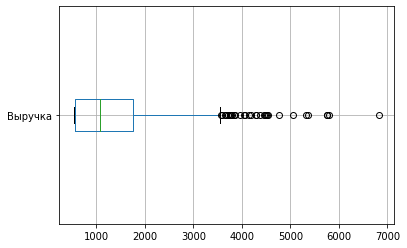

In [169]:
ax=smart[['total_fee']].boxplot(vert=False)
ax.set_yticklabels(['Выручка'])
plt.show()

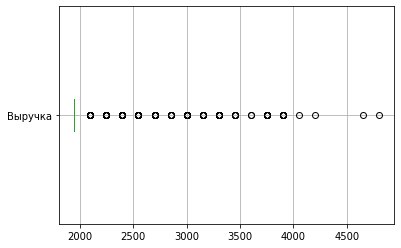

In [170]:
ax=ultra[['total_fee']].boxplot(vert=False)
ax.set_yticklabels(['Выручка'])
plt.show()

# Построим графики распределения

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7486a40090>,
      dtype=object)

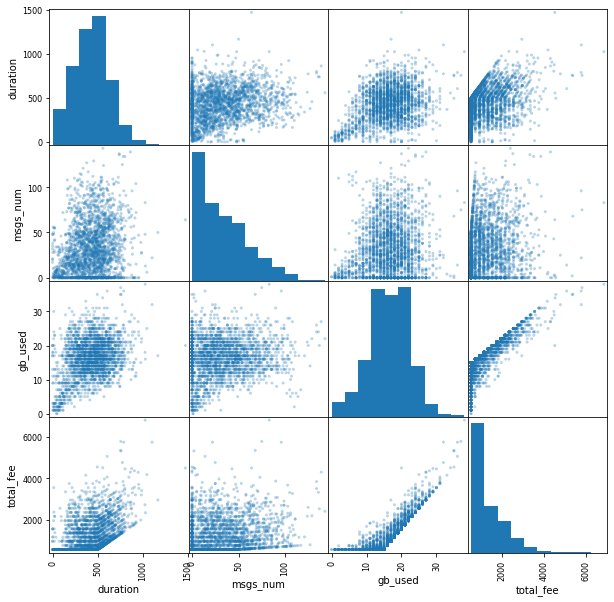

In [194]:
smart.describe()
pd.plotting.scatter_matrix(smart[['duration','msgs_num','gb_used','total_fee']], alpha = 0.3, figsize = (10,10))


# Распределения - тариф "Смарт"
1. Кол-во минут - нормальное
2. Кол-во сообщений - распределение Пуассона
3. Кол-во мегабайт - нормальное

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7485f46a90>,
      dtype=object)

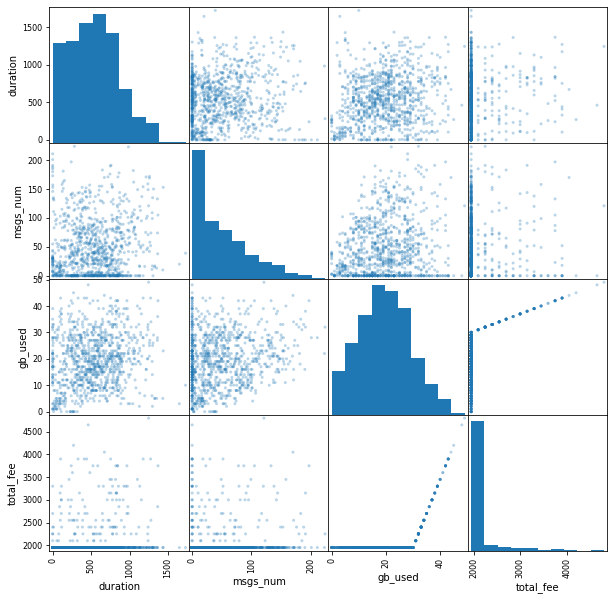

In [196]:
pd.plotting.scatter_matrix(ultra[['duration','msgs_num','gb_used','total_fee']], alpha = 0.3, figsize = (10,10))


# Распределения - тариф "Ультра"
1. Кол-во минут - нормальное
2. Кол-во сообщений - распределение Пуассона
3. Кол-во мегабайт - нормальное


Рассчитаем максимальные значения с применением правил трех сигм, все что больше будем считать выбросами.

In [171]:
parameters_s = smart[['total_fee']].describe().T
q1_s, q2_s = parameters_s['25%'][0], parameters_s['75%'][0]
iqr_s = q2_s - q1_s
max_value_s = q2_s + 3*iqr_s
max_value_s

5369.0

In [172]:
parameters_s

,count,mean,std,min,25%,50%,75%,max
total_fee,"2,229.00","1,311.62",830.04,550.00,553.00,"1,075.00","1,757.00","6,824.00"


In [173]:
parameters_u = ultra[['total_fee']].describe().T
q1_u, q2_u = parameters_u['25%'][0], parameters_u['75%'][0]
iqr_u = q2_u - q1_u
max_value_u = q2_u + 3*iqr_u
max_value_u

1950.0

In [207]:

standard_deviation = np.sqrt(max_value_u)
print(max_value_u)
parameters_u

1950.0


,count,mean,std,min,25%,50%,75%,max
total_fee,985.00,"2,071.07",378.80,"1,950.00","1,950.00","1,950.00","1,950.00","4,800.00"


## Вывод
Для нормальных распределений верно правило трёх стандартных отклонений,
или правило трёх сигм. Оно гласит — практически все значения (около 99%) находятся в
промежутке:
(\mu - 3\sigma, \mu + 3\sigma)(μ−3σ,μ+3σ)

Т.е. по моему мнению мы доказали, что наше распределение является нормальным распределением, построили гарфики распределения и вычеслели, в каком промежутке у нас находится стандартное отклонение.


### Выведим гистограммы по минутам разговора


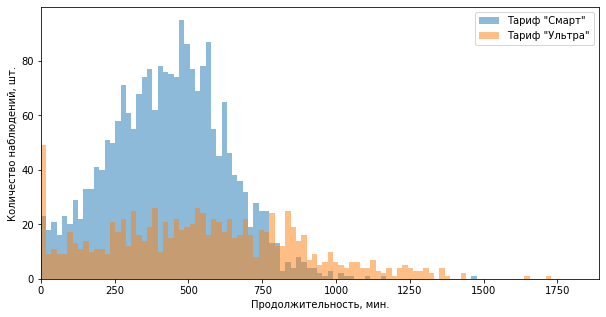

In [175]:
plt.figure(figsize = (10,5))
plt.hist(revenue.query('tariff == "smart"')['duration'], bins=100, alpha=0.5, label='Тариф "Смарт"', range = (0, 1800))
plt.hist(revenue.query('tariff == "ultra"')['duration'], bins=100, alpha=0.5, label='Тариф "Ультра"', range = (0, 1800))
plt.legend(loc='best')
plt.xlim(left = 0)
plt.xlabel('Продолжительность, мин.')
plt.ylabel('Количество наблюдений, шт.')
plt.show()

Вывод: Пиковые значения по тарифу "Смарт"  приходятся на 280, 400 и 470 минут. Пиковое значение по тарифу "Ультра" - 540 минут. Основная масса клиентов совершает звонки в диапазоне от 250 до 870 минут. В обоих распределениях имеются "большие хвосты вправо", что говорит о том, что основной объем минут находится в левой части, т.е. с более низкими значениями.

### Выведим гистограммы по сообщениям

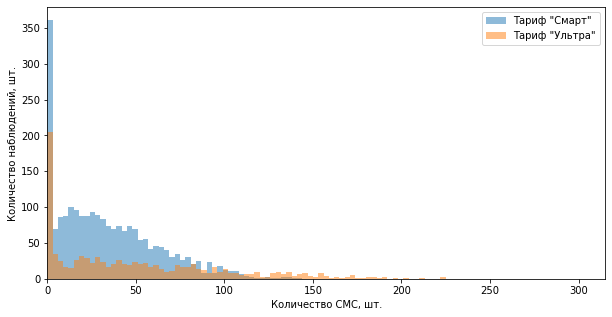

In [176]:
fig = plt.figure(figsize = (10,5))
plt.hist(revenue.query('tariff == "smart"')['msgs_num'], bins=100, alpha=0.5, label='Тариф "Смарт"', range = (0, 300))
plt.hist(revenue.query('tariff == "ultra"')['msgs_num'], bins=100, alpha=0.5, label='Тариф "Ультра"', range = (0, 300))
plt.legend(loc='best')
plt.xlim(left = 0)
plt.xlabel('Количество СМС, шт.')
plt.ylabel('Количество наблюдений, шт.')
plt.show()

Вывод: По обоим тарифам почти никто не отправляет более 100 СМС в месяц. В обоих распределениях имеются "большие хвосты вправо", что говорит о том, что основной объем отправляемых СМС находится в левой части, т.е. с более низкими значениями. Видимо "эра" смс подошла к концу с появлением месенджеров...

### Выведим гистограммы по интренет-трафику

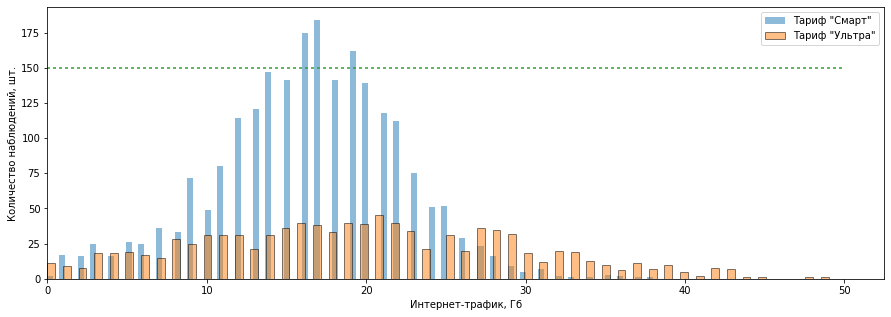

In [177]:
fig = plt.figure(figsize = (15,5))
plt.hist(revenue.query('tariff == "smart"')['gb_used'], bins=100, alpha=0.5, label='Тариф "Смарт"')
plt.hist(revenue.query('tariff == "ultra"')['gb_used'], bins=100, alpha=0.5, label='Тариф "Ультра"', ec="k")
plt.plot([0, 50], [150, 150],dashes=[2, 2])
plt.xlim(left = 0)
plt.legend(loc='best')
plt.xlabel('Интернет-трафик, Гб')
plt.ylabel('Количество наблюдений, шт.')
plt.show()

Вывод: Скачков на нулях почти не наблюдается. По тарифу "Смарт" пиковое значение приходятся на 17 Гб. Пиковое значение по тарифу "Ультра" - на 19-21 Гб. Можно отметить, что в целом графики интернет-траффика имеют нормальное распределение с минимальным количеством выбросов.

## Проверка гипотез и пояснения

При проверке гипотез о равенстве среднего будем применять метод "Гипотез о равенстве средних двух
генеральных совокупностей", т.к. будем проводить сравнения двух независимых выборок большого размера. Критический уровень статистической значимости примем равным 5%.

Средняя выручка пользователей тарифов «Ультра» и «Смарт»:
0-средняя выручка пользователей тарифов «Смарт» и «Ультра» не различается
1-средняя выручка пользователей тарифов «Смарт» и «Ультра» различается

In [178]:
alpha=0.05
results = st.ttest_ind(revenue.query("tariff=='smart'")['total_fee'],
                            revenue.query("tariff=='ultra'")['total_fee'])
print('p-value:', results)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: Ttest_indResult(statistic=-27.47710593906359, pvalue=1.8236591828898301e-149)
Отвергаем нулевую гипотезу


# Вывод: средняя выручка пользователей тарифов «Смарт» и «Ультра» различается

# Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
1. 0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
2. 1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [179]:
revenue_cities=revenue.merge(users,how='left',on=['user_id'])
alpha=0.05
results = st.ttest_ind(revenue_cities.query('city=="Москва"')['total_fee'],
                            revenue_cities.query('city!="Москва"')['total_fee'])
print('p-value:', results)

p-value: Ttest_indResult(statistic=0.5543033038951601, pvalue=0.5794098792001432)


In [180]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


# Вывод: Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

## Общий вывод



1. Предобработка данных: данные приведены к нужным типам, найдены и исправлены ошибки в данных, обработаны нулевые значения в данных.
2. Посчитаны для каждого пользователя:
количество сделанных звонков и израсходованных минут разговора по месяцам;
количество отправленных сообщений по месяцам;
объем израсходованного интернет-трафика по месяцам;
помесячная выручка с каждого пользователя.
3. Проведен статистический анализ данных:
описано поведение клиентов оператора, исходя из выборки;
подсчитано сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц;* подсчитаны среднее количество, дисперсия и стандартное отклонение;
построены гистограммы;
опишисаны распределения.
4. Проверены гипотезы:
средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Количество минут разговора в месяц на тарифе "Смарт" составляет - 77631, на тарифе "Ультра" - 43227. Количество сообщений в месяц на тарифе "Смарт" составляет - 6201, на тарифе "Ультра" - 4052. Объем трафика (в Гб) в месяц на тарифе "Смарт" составляет - 3033, на тарифе "Ультра" - 1600. В тарифе "Ультра" практически никто не выходит за рамки пределы лимитов, тогда как в тарифе "Смарт" при стоимости 550 руб. в месяц разброс относительно большой, а мат. ожидание равно 818 руб. Нормальные значения для тарифа "Смарт" от 550 руб. до 1 750 руб., прочие можем считать выбросами. Максимально допустимое значение у тарифа "Смарт" - 5 350 руб. Для тарифа Ultra нормальное значение - цена тарифа, 1 950р.Проверка гипотезы только подтвердила, что различия в средних неслучайны. Также выявили, что выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Итог: Можно сделать вывод, что тариф Ultra более перспективный!